# Solving Human Resources Issues

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
# Load file CSV
df = pd.read_csv('./datasets/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
# Checking the total number of numerical and categorical variables
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

print("Number of numerical variables:", len(num))
print("Number of categorical variables:", len(cat))

Number of numerical variables: 27
Number of categorical variables: 8


In [4]:
# Missing Value Check
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
# Check for Duplicates
df.duplicated().sum()

0

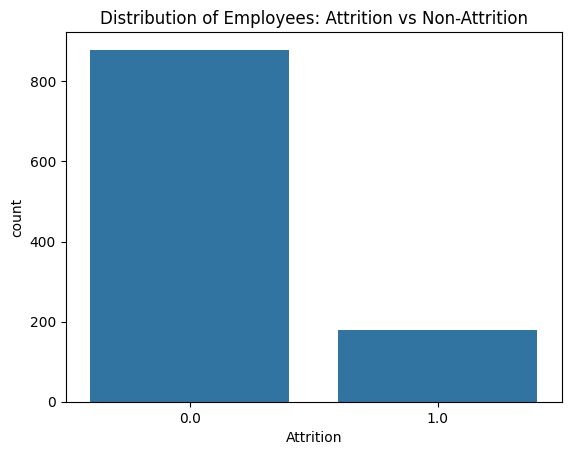

In [6]:
# Target Distribution
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Employees: Attrition vs Non-Attrition')
plt.show()

# Exploratory Data Analysis

In [7]:
# Descriptive statistics for numerical data
num = df.select_dtypes(exclude='object').columns
df[num].describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


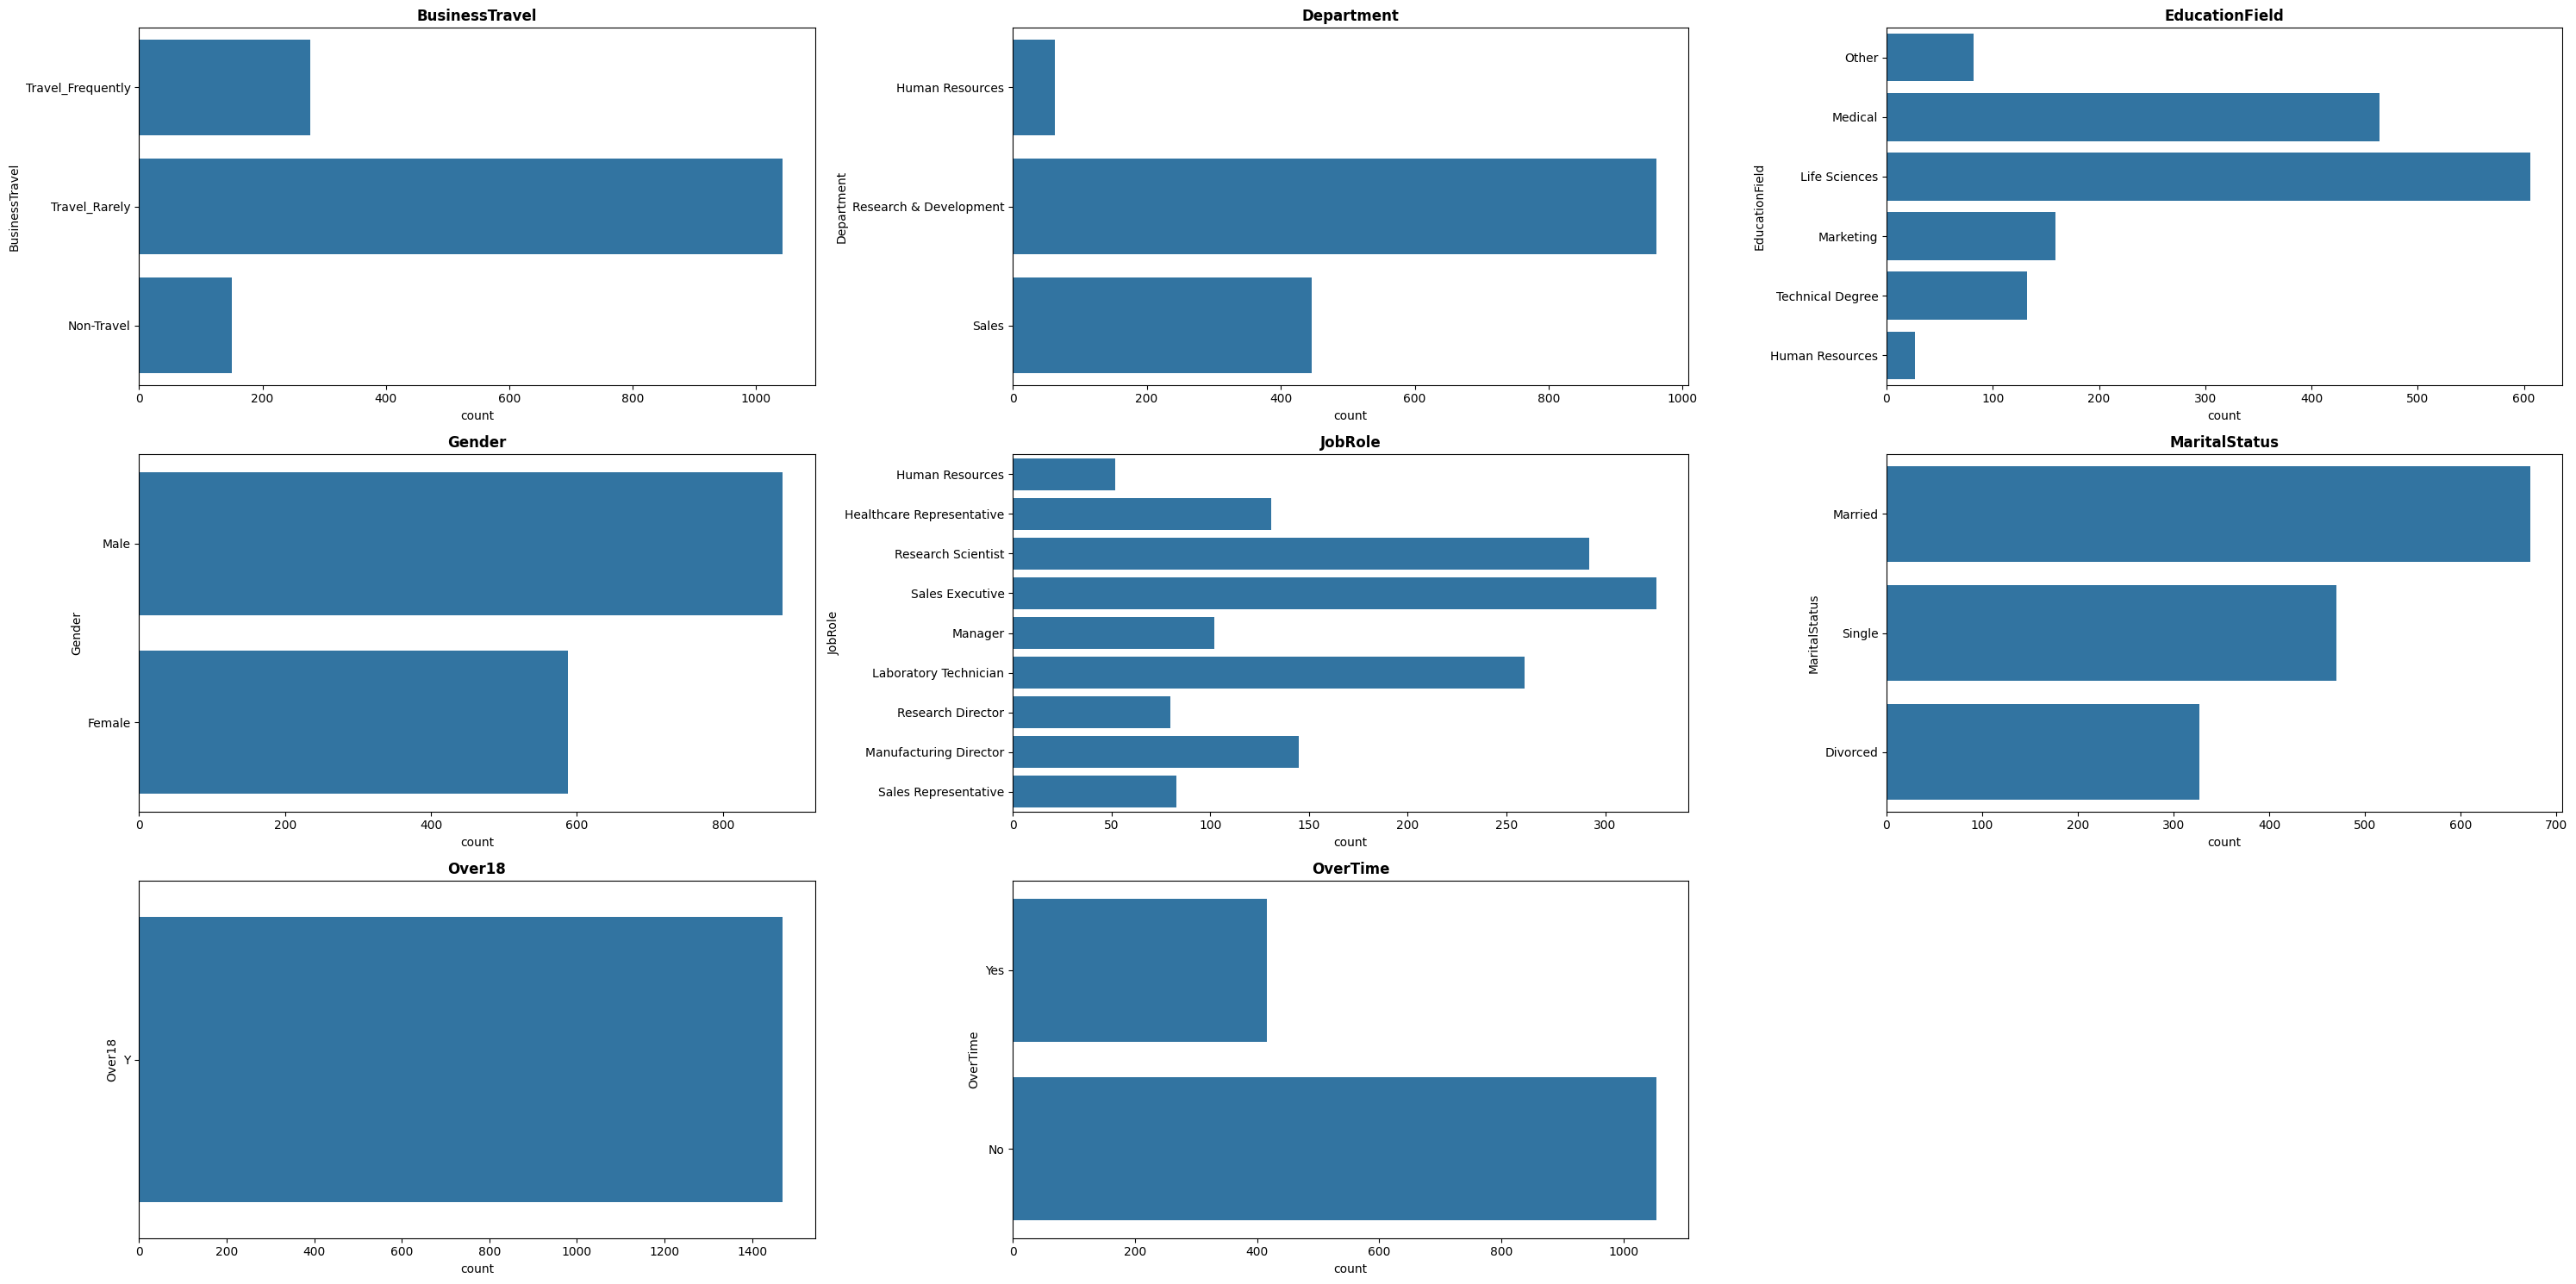

In [8]:
# Univariate Categorical
def plot_categorical_distribution(data, num_cols=3):
    """
    Function to display category distribution for categorical columns.

    Args:
        data (pd.DataFrame): Data to be analyzed.
        num_cols (int): Number of columns in subplot. Default is 3.
    """
    categorical_cols = data.select_dtypes(include='object').columns.tolist()
    num_plots = len(categorical_cols)
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(data=data, y=col, ax=axes[i])
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].tick_params(axis='y', rotation=0)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df)

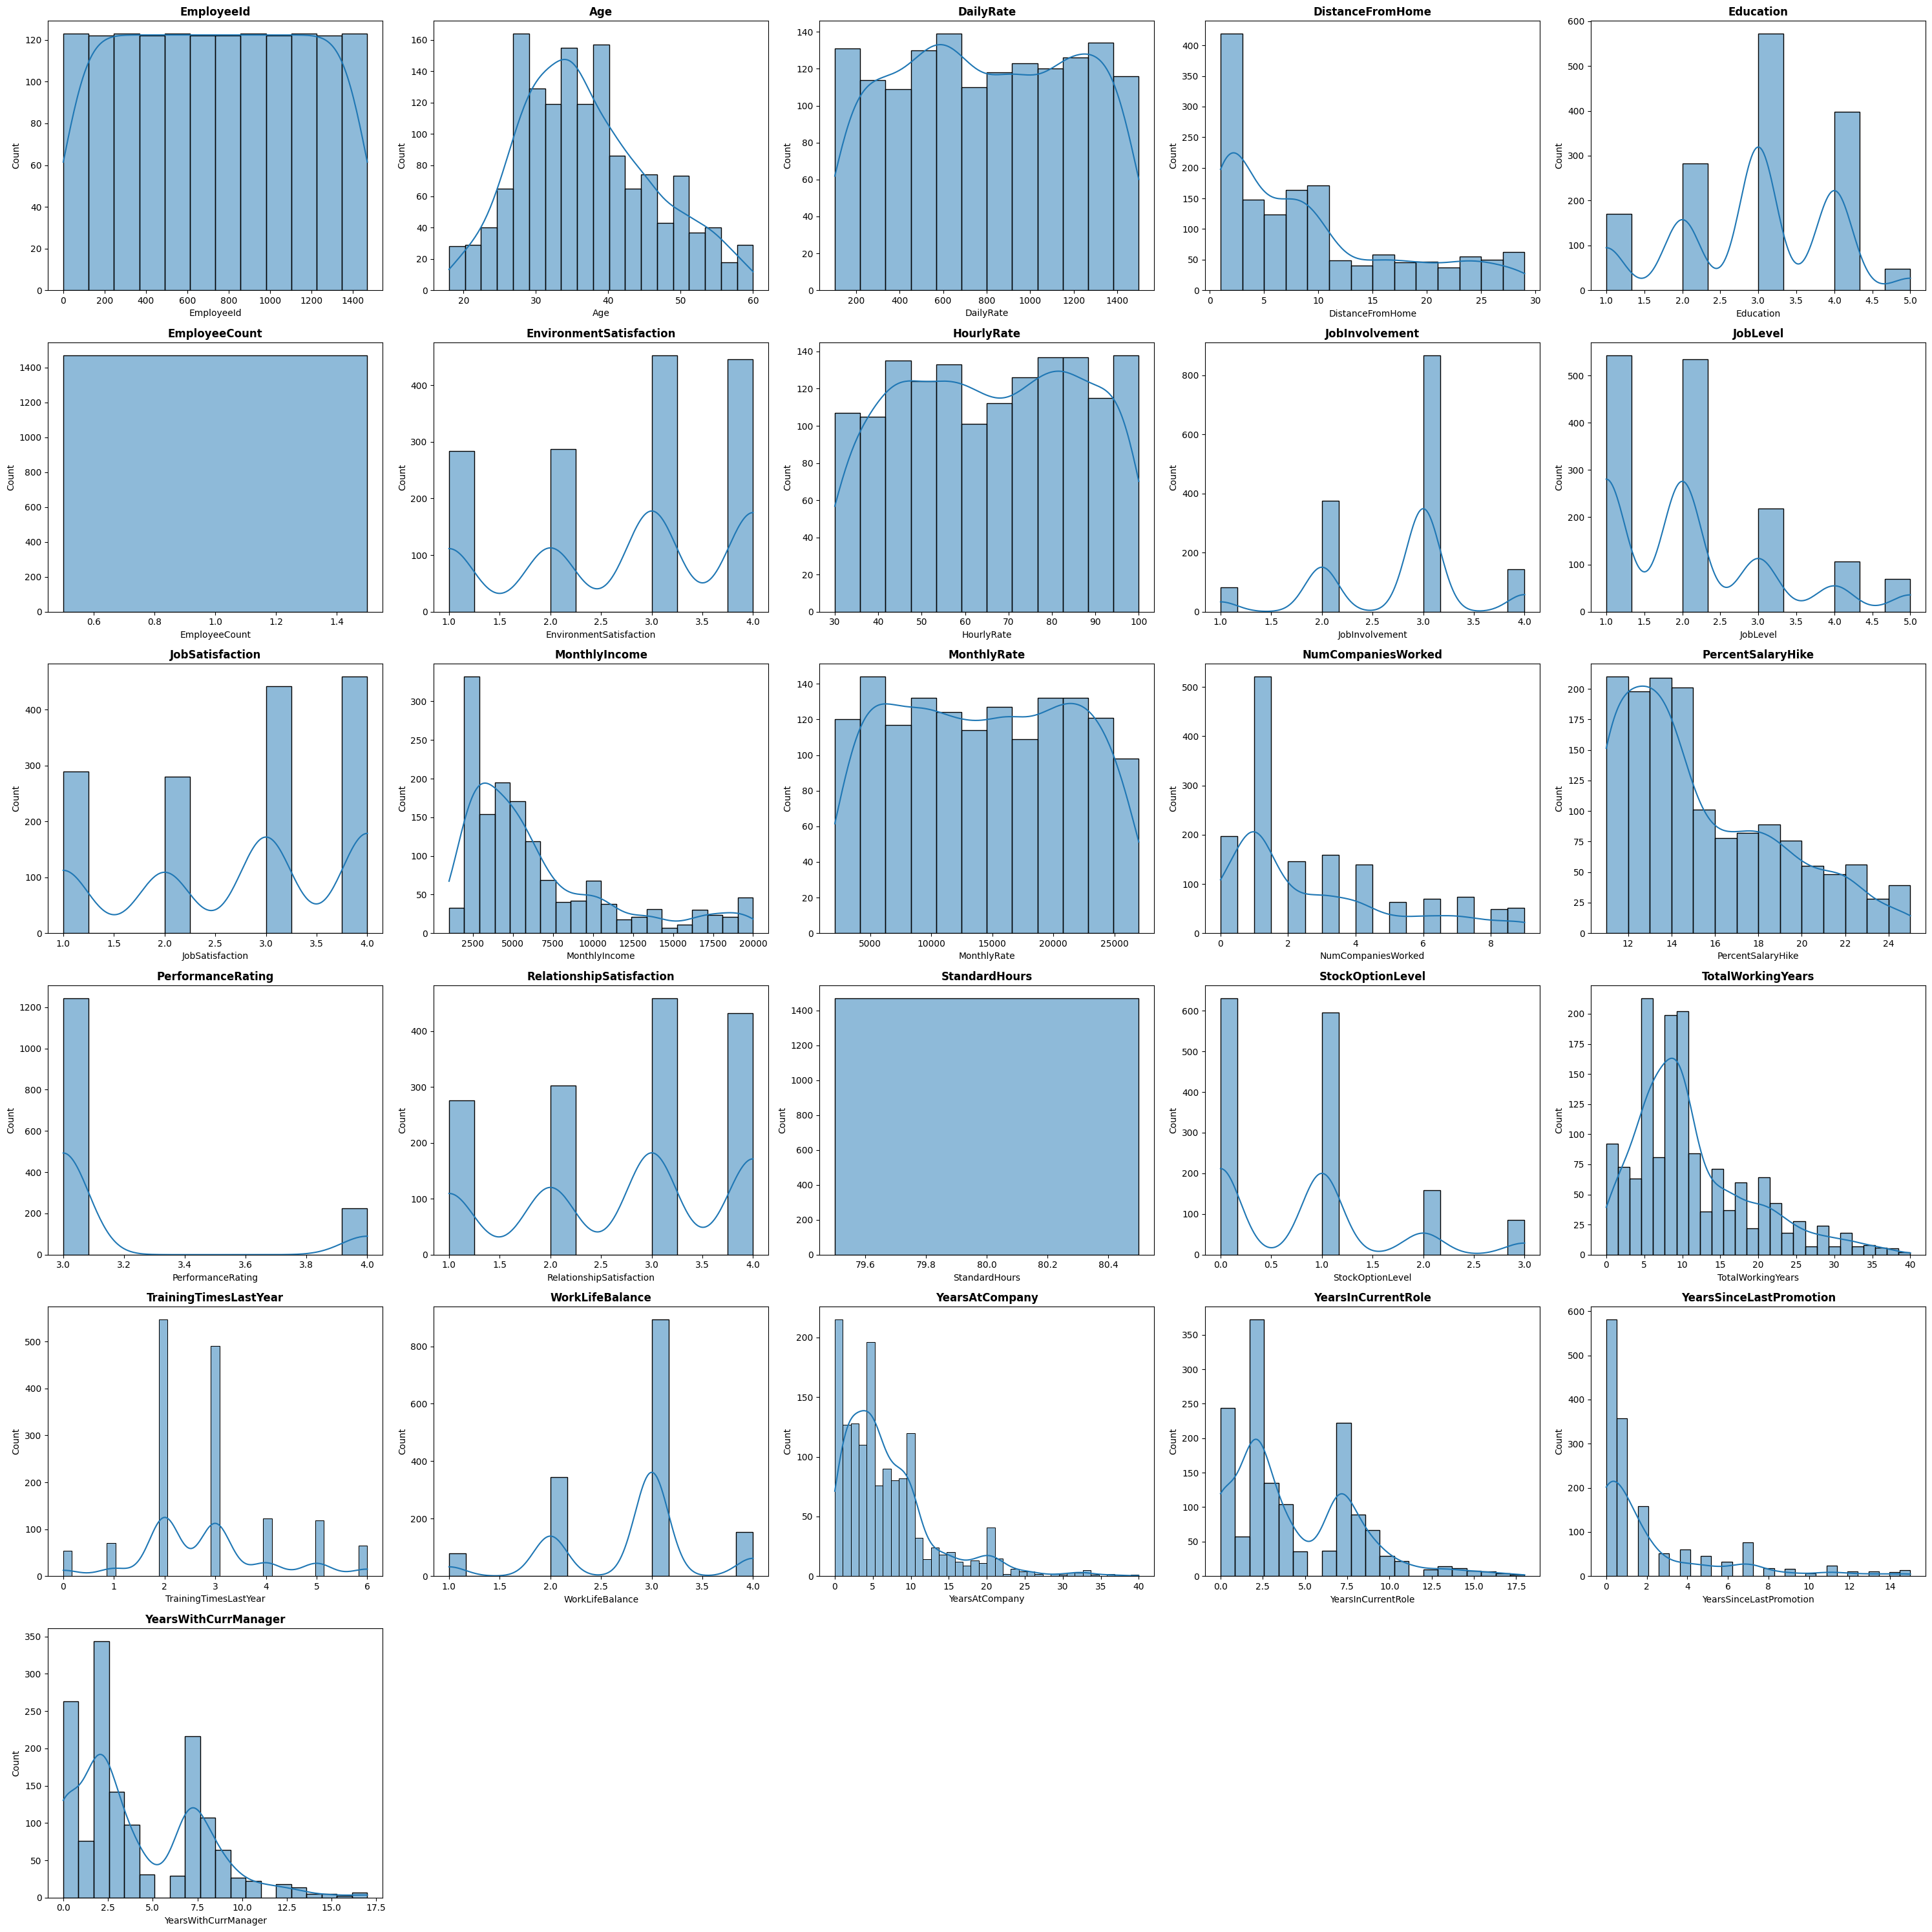

In [9]:
# Univariate Numerical
def plot_numerical_distribution(data, exclude_cols=None, num_cols=5):
    """
    Function to display the distribution of numerical variables in the dataset.

    Args:
        data (pd.DataFrame): Data to be analyzed.
        exclude_cols (list): Columns to exclude from analysis (e.g., 'Attrition').
        num_cols (int): Number of columns in subplot. Default is 5.
    """
    numerical_cols = data.select_dtypes(include='number').columns.tolist()
    if exclude_cols:
        numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

    num_plots = len(numerical_cols)
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col}', fontweight='bold')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_distribution(df, exclude_cols=['Attrition'])

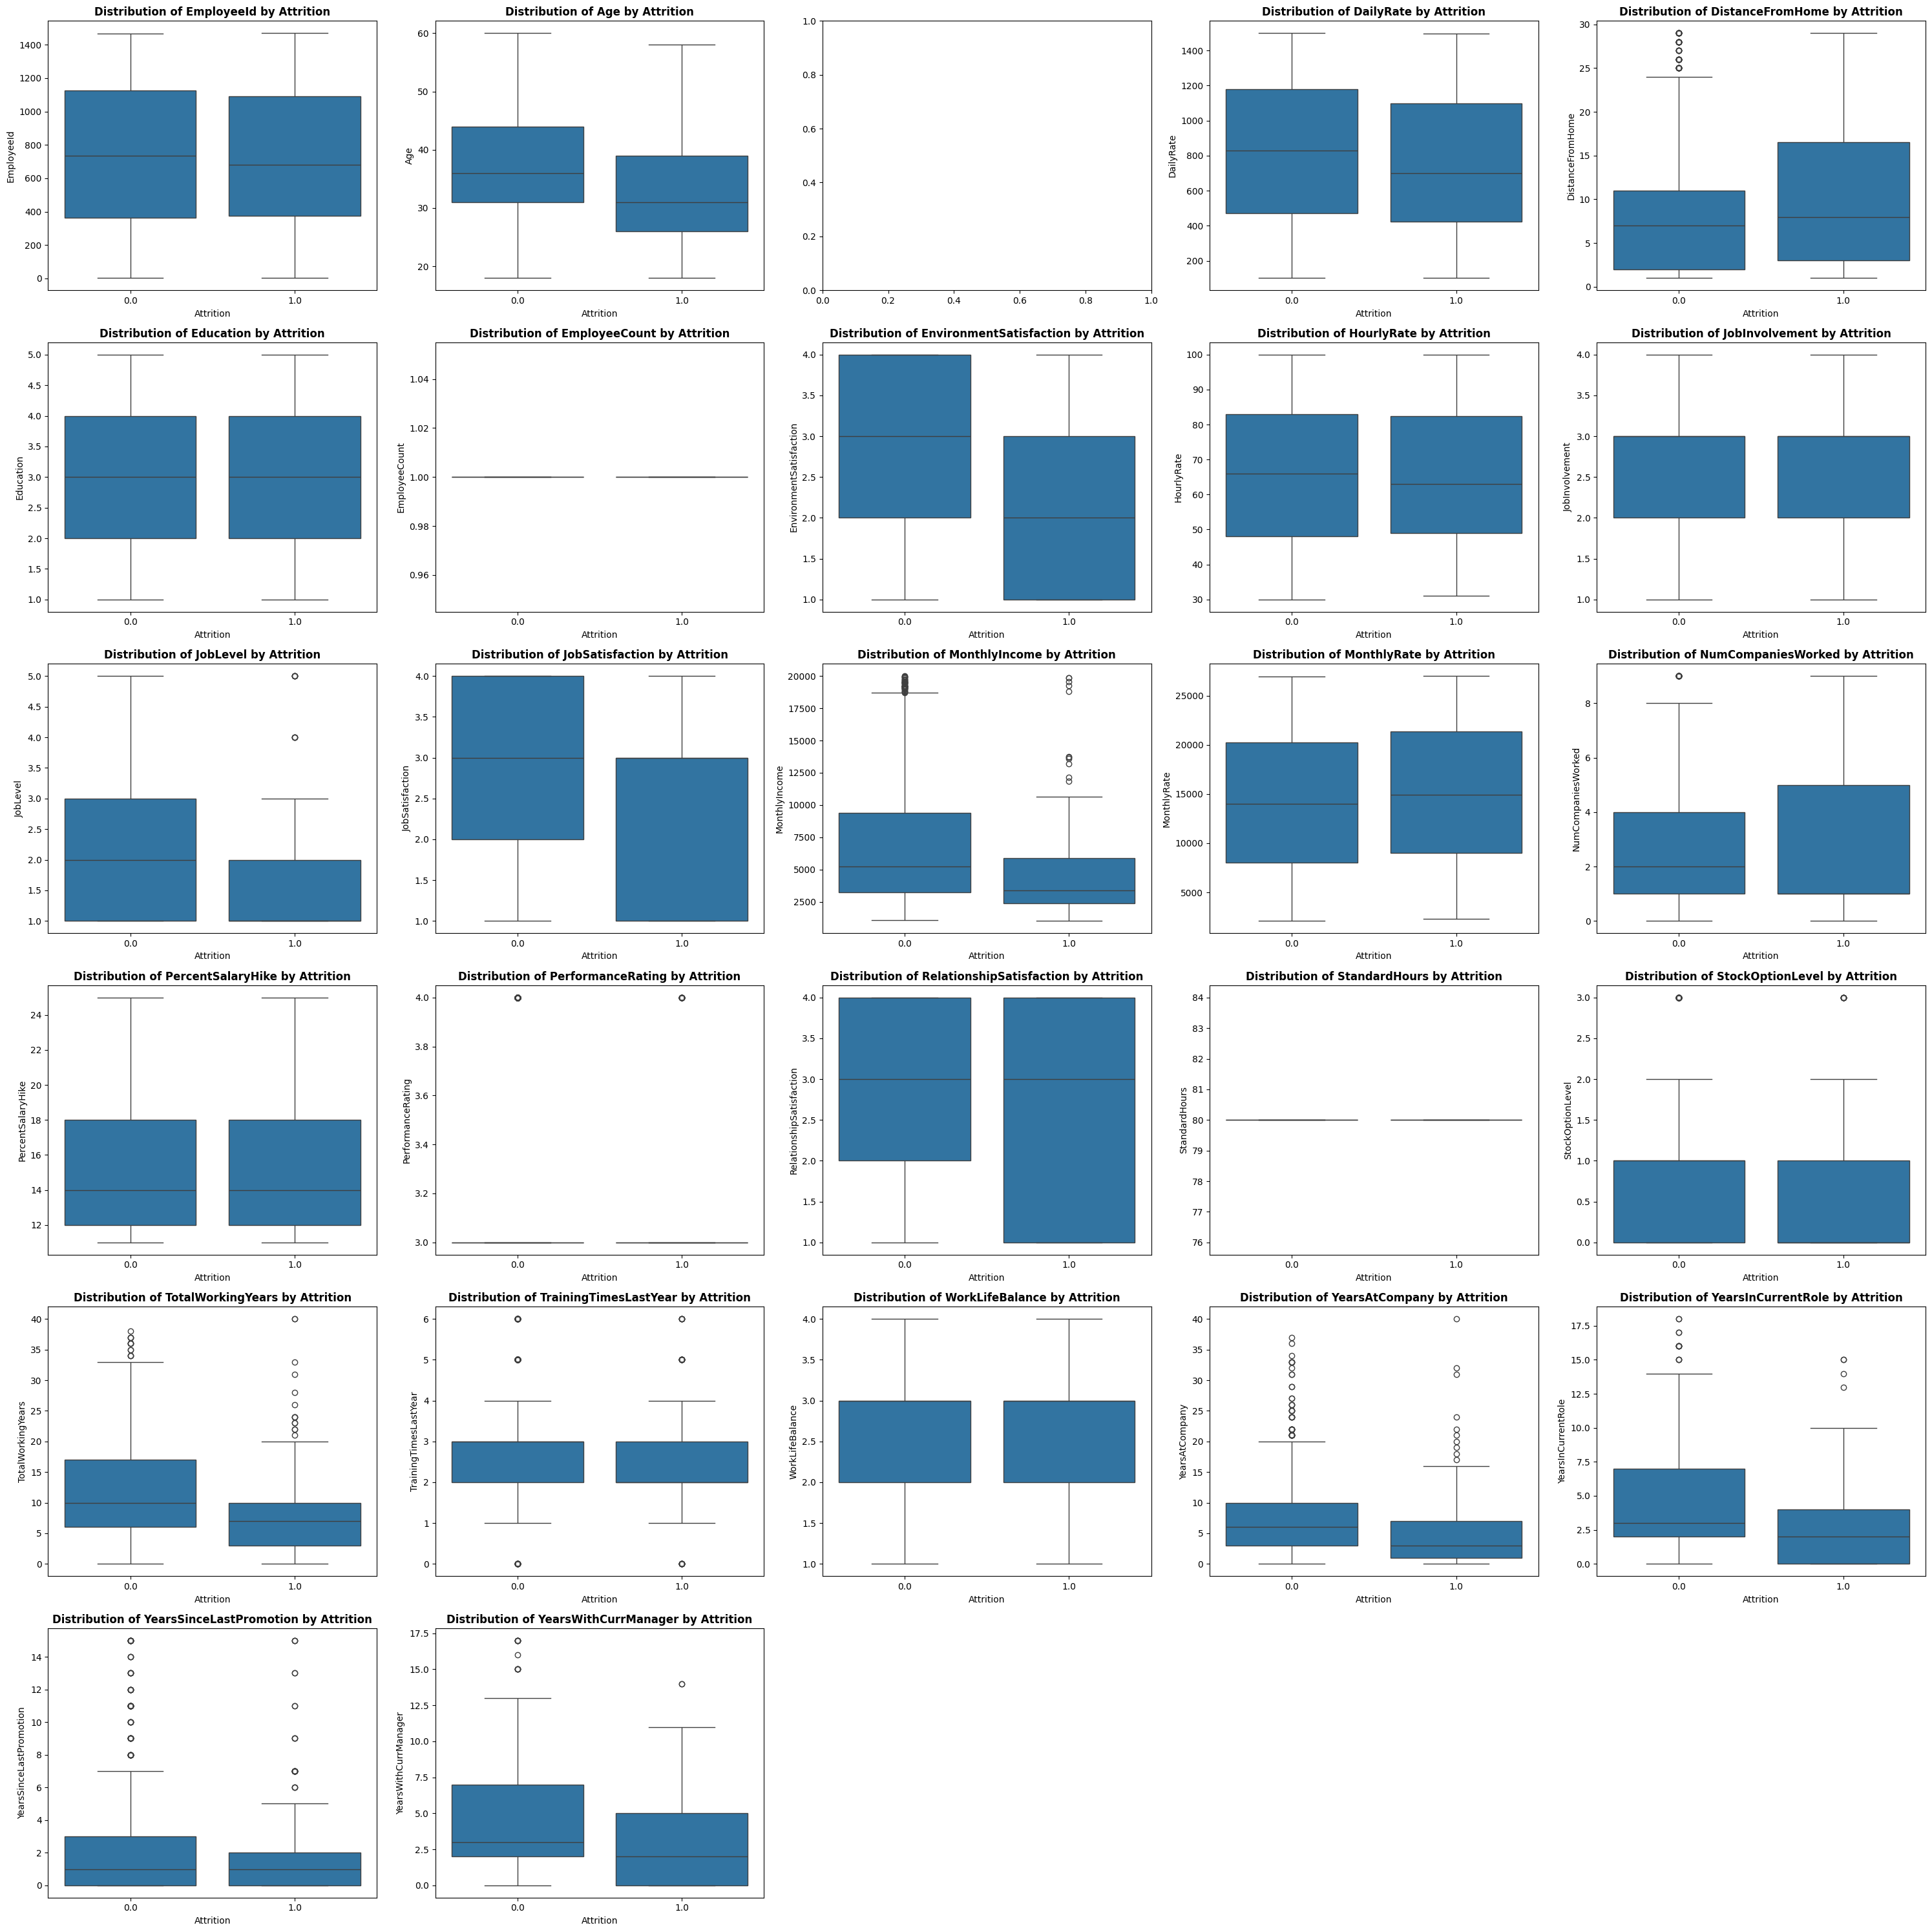

In [10]:
# Multivariate comparison of Numerical variables with Attrition
def plot_numerical_vs_attrition(data, target_col='Attrition', num_cols=5):
    """
    Function to show the relationship between numerical variables and the target column (e.g., 'Attrition').

    Args:
        data (pd.DataFrame): Dataset to be analyzed.
        target_col (str): Name of the target column (e.g., 'Attrition').
        num_cols (int): Number of columns in subplot. Default is 5.
    """
    numerical_cols = data.select_dtypes(include='number').columns.tolist()
    num_plots = len(numerical_cols)
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        if col != target_col:
            sns.boxplot(x=target_col, y=col, data=data, ax=axes[i])
            axes[i].set_title(f'Distribution of {col} by {target_col}', fontweight='bold')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_vs_attrition(df)

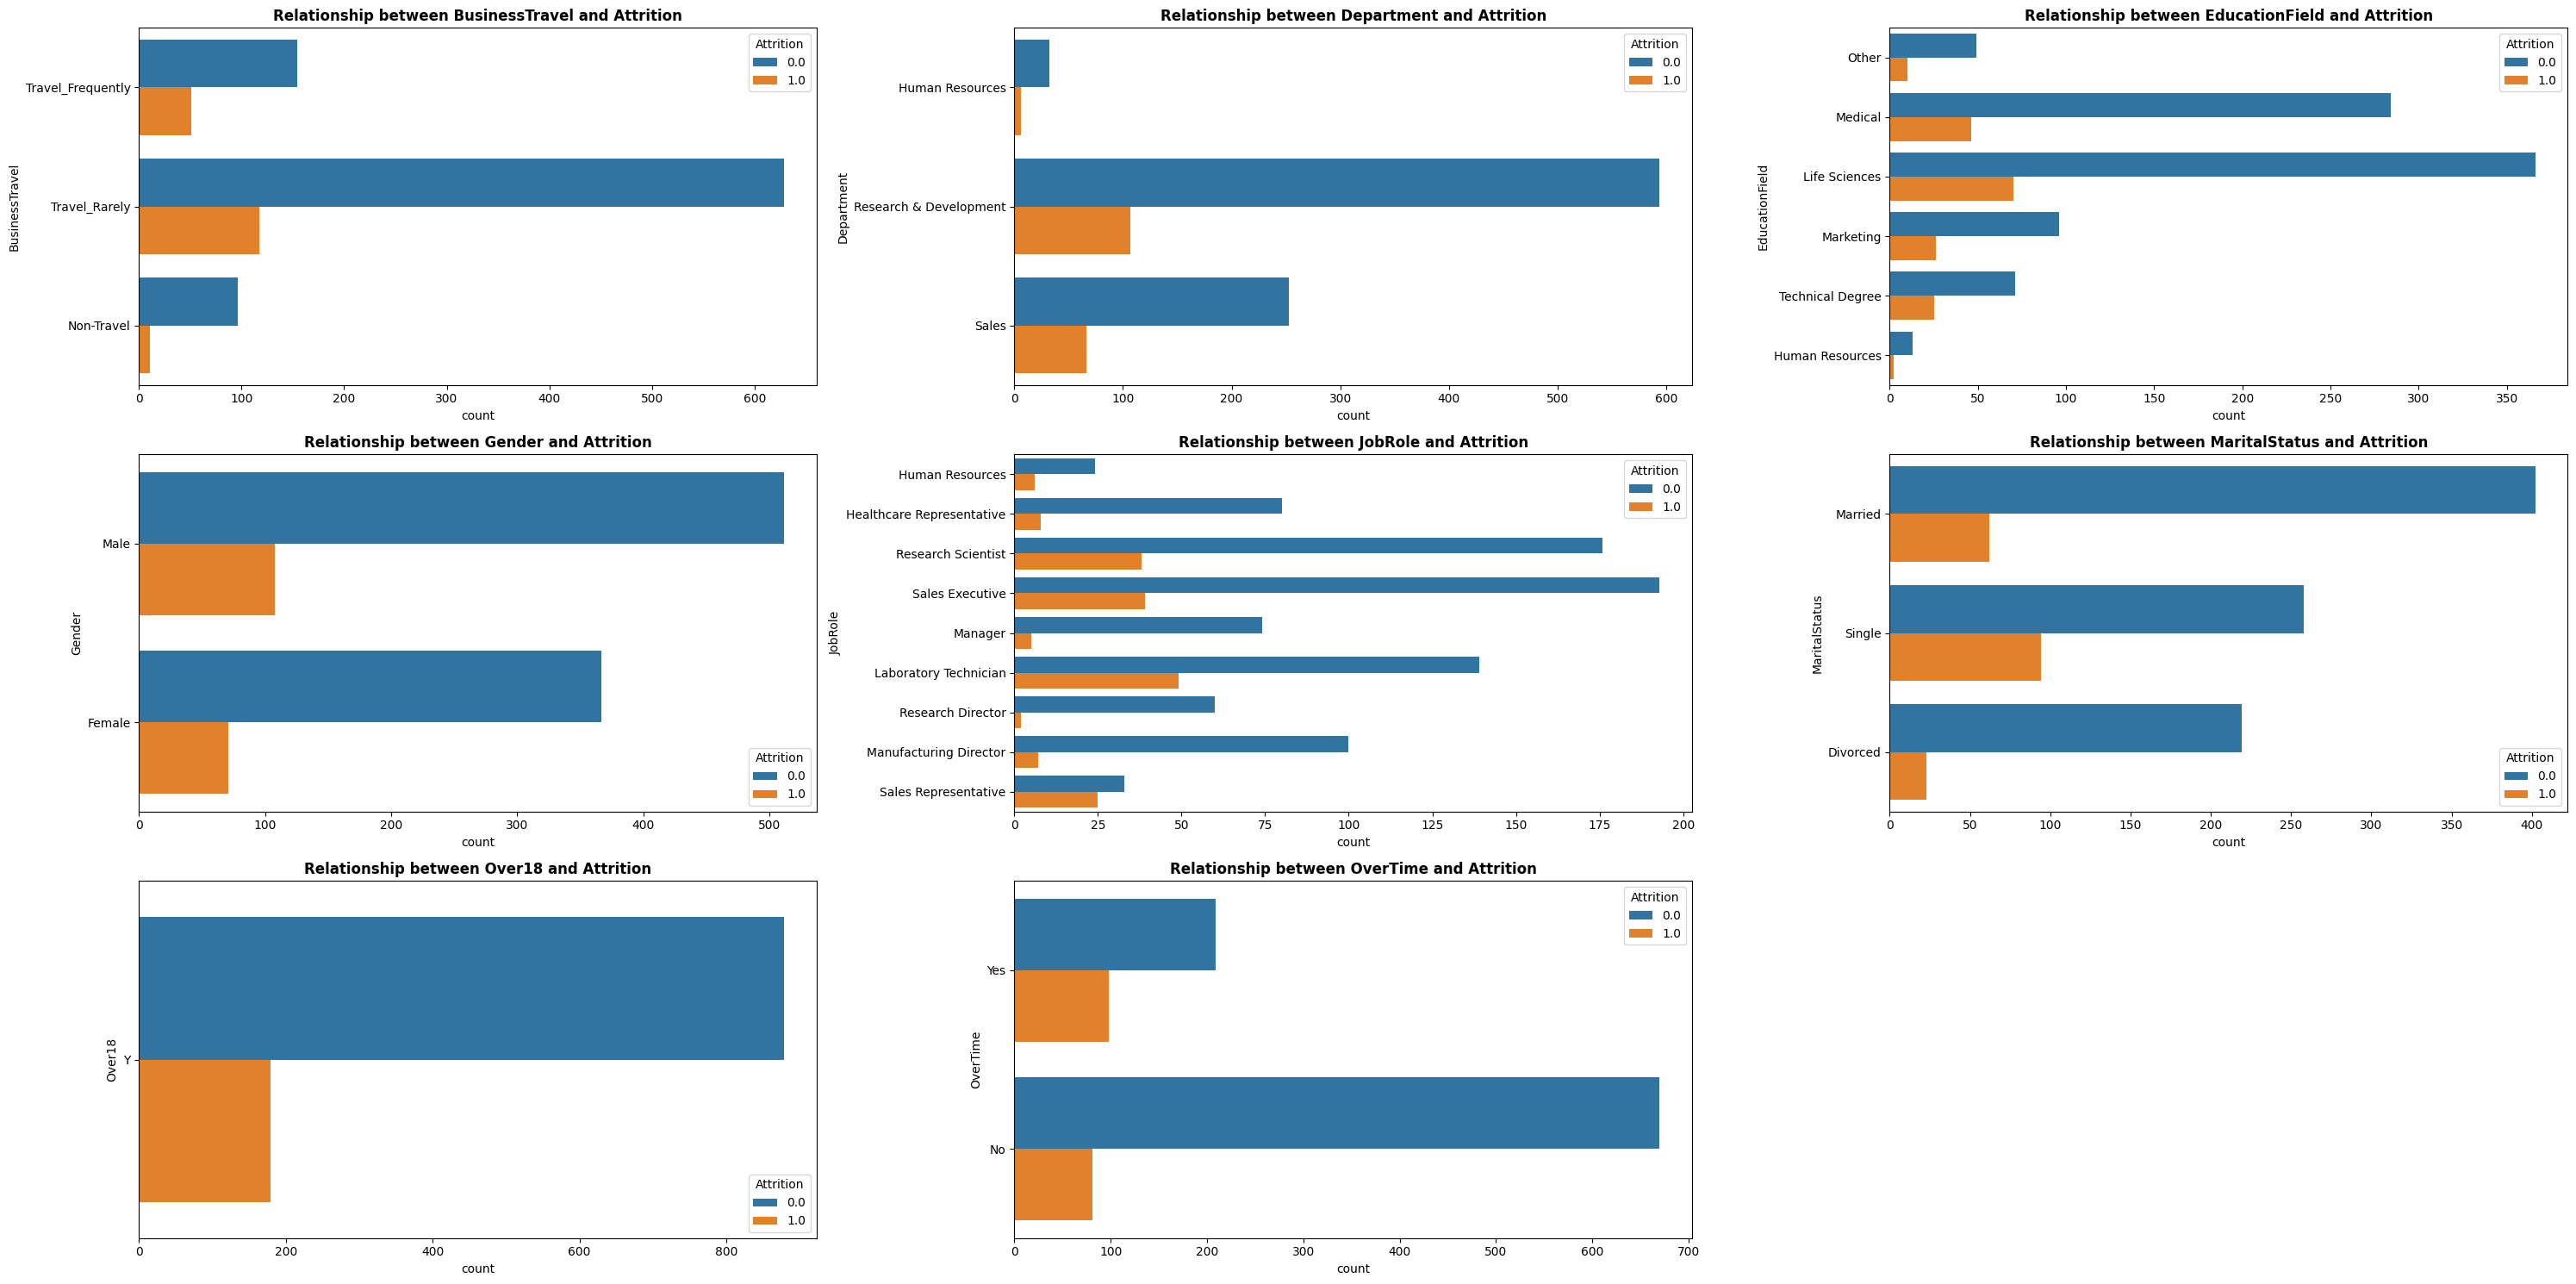

In [11]:
# Multivariate Comparison of Categorical Variables with Attrition
def plot_categorical_vs_attrition(data, target_col='Attrition', num_cols=3, bar_colors=['#1f77b4', '#ff7f0e']):
    """
    Function to show the relationship between categorical variables and the target column (e.g., 'Attrition').

    Args:
        data (pd.DataFrame): Dataset to be analyzed.
        target_col (str): Name of the target column (e.g., 'Attrition').
        num_cols (int): Number of columns in subplot. Default is 3.
        bar_colors (list): List of colors for bars based on categories (e.g., [color_attrition, color_non_attrition]).
    """
    categorical_cols = data.select_dtypes(include='object').columns.tolist()

    num_plots = len(categorical_cols)
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        ax = sns.countplot(data=data, y=col, hue=target_col, ax=axes[i], palette={0: bar_colors[1], 1: bar_colors[0]})
        axes[i].set_title(f'Relationship between {col} and {target_col}', fontweight='bold')
        axes[i].tick_params(axis='y', rotation=0)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_vs_attrition(df, bar_colors=['#ff7f0e', '#1f77b4'])

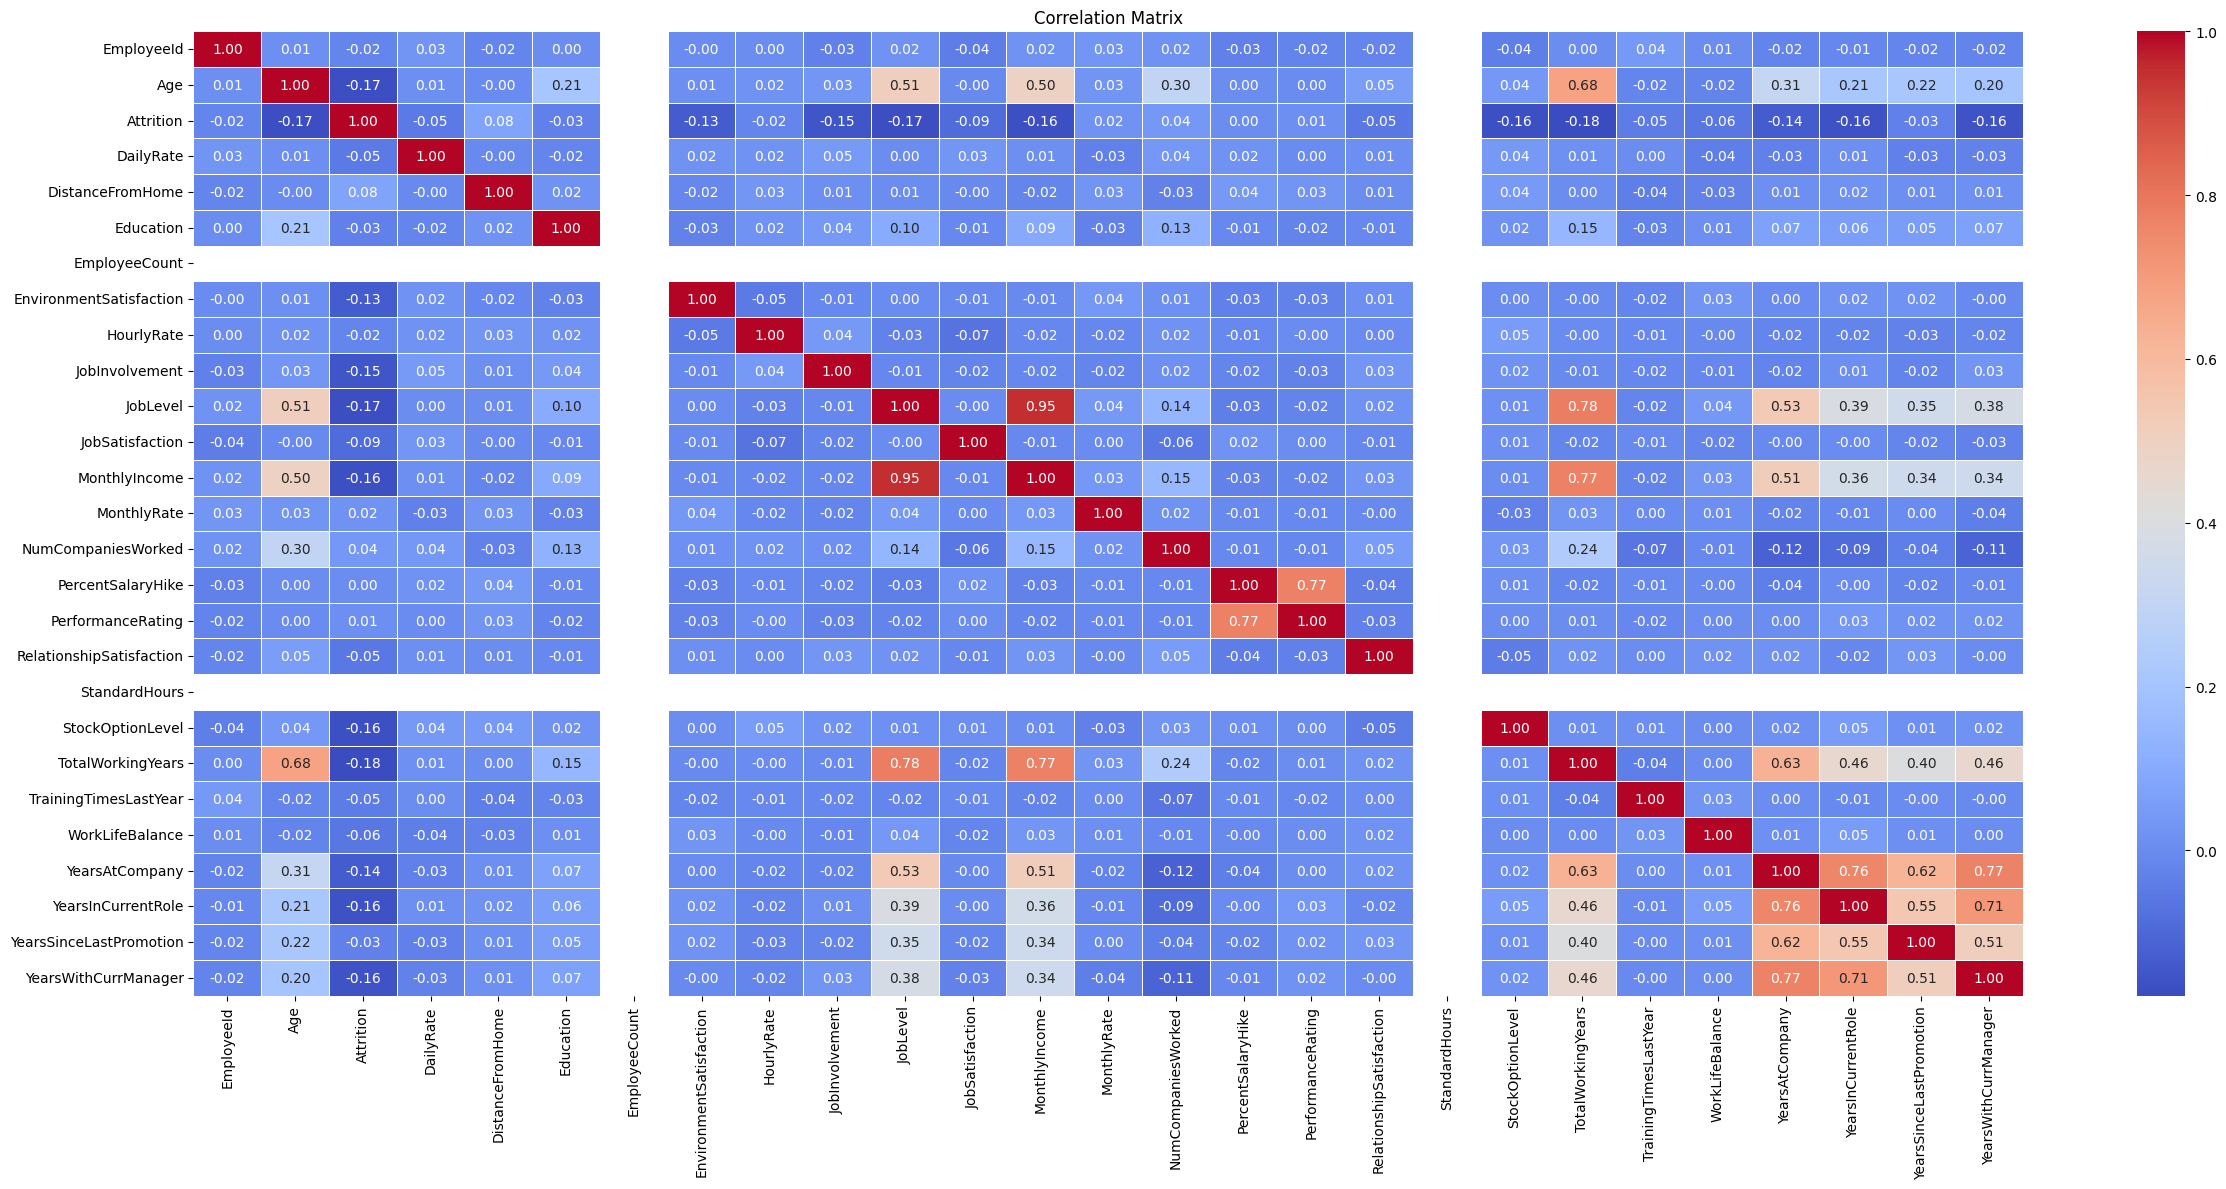

In [12]:
# EDA Bivariate Correlation Matrix
numerical_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Drop some irrelevant columns
drop_columns = ['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=drop_columns, inplace=True)

In [14]:
# Convert Attrition data type to int
df.dropna(subset=['Attrition'], inplace=True)
df['Attrition'] = df['Attrition'].astype(int)

In [15]:
# Perform Label Encoding on all categorical columns
categorical_cols = df.select_dtypes(include="object").columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [16]:
# Scaling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
# Save the cleaned dataset
df_clean = df
df_clean

df_clean.to_csv('./datasets/clean_data.csv', index=False)

# Modeling

In [18]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_model = grid_rf.best_estimator_

In [19]:
# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample':[0.7, 1.0]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
xgb_model = grid_xgb.best_estimator_

# Evaluation

In [20]:
# Model evaluation for Random Forest and XGBoost
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [21]:
# Display Random Forest model evaluation results
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8491

Confusion Matrix:
 [[172   1]
 [ 31   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       173
           1       0.89      0.21      0.33        39

    accuracy                           0.85       212
   macro avg       0.87      0.60      0.62       212
weighted avg       0.85      0.85      0.81       212



In [22]:
# Display XGBoost model evaluation results
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8585

Confusion Matrix:
 [[170   3]
 [ 27  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       173
           1       0.80      0.31      0.44        39

    accuracy                           0.86       212
   macro avg       0.83      0.65      0.68       212
weighted avg       0.85      0.86      0.83       212



### Feature Importance

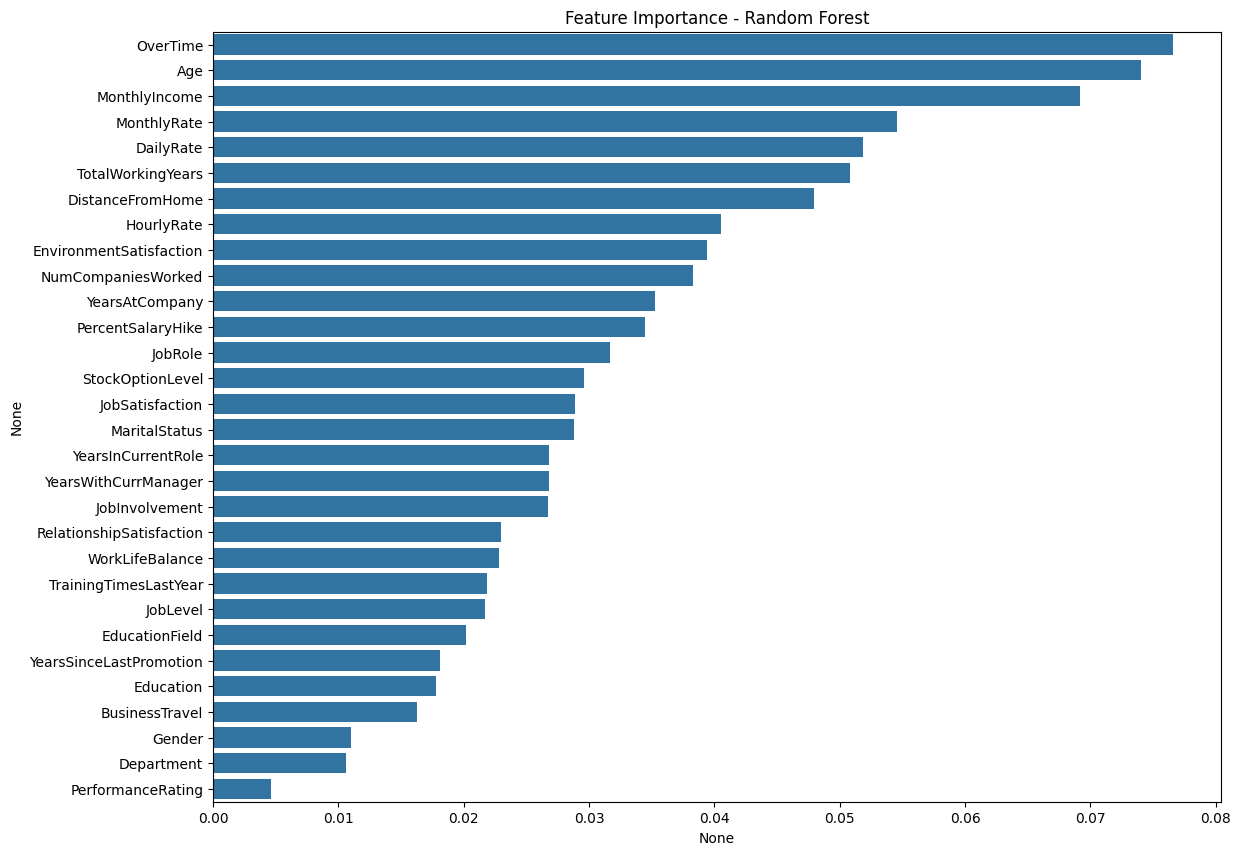

In [23]:
# Create Feature Importance plot for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
forest_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(13,10))
sns.barplot(x=forest_importance, y=forest_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()

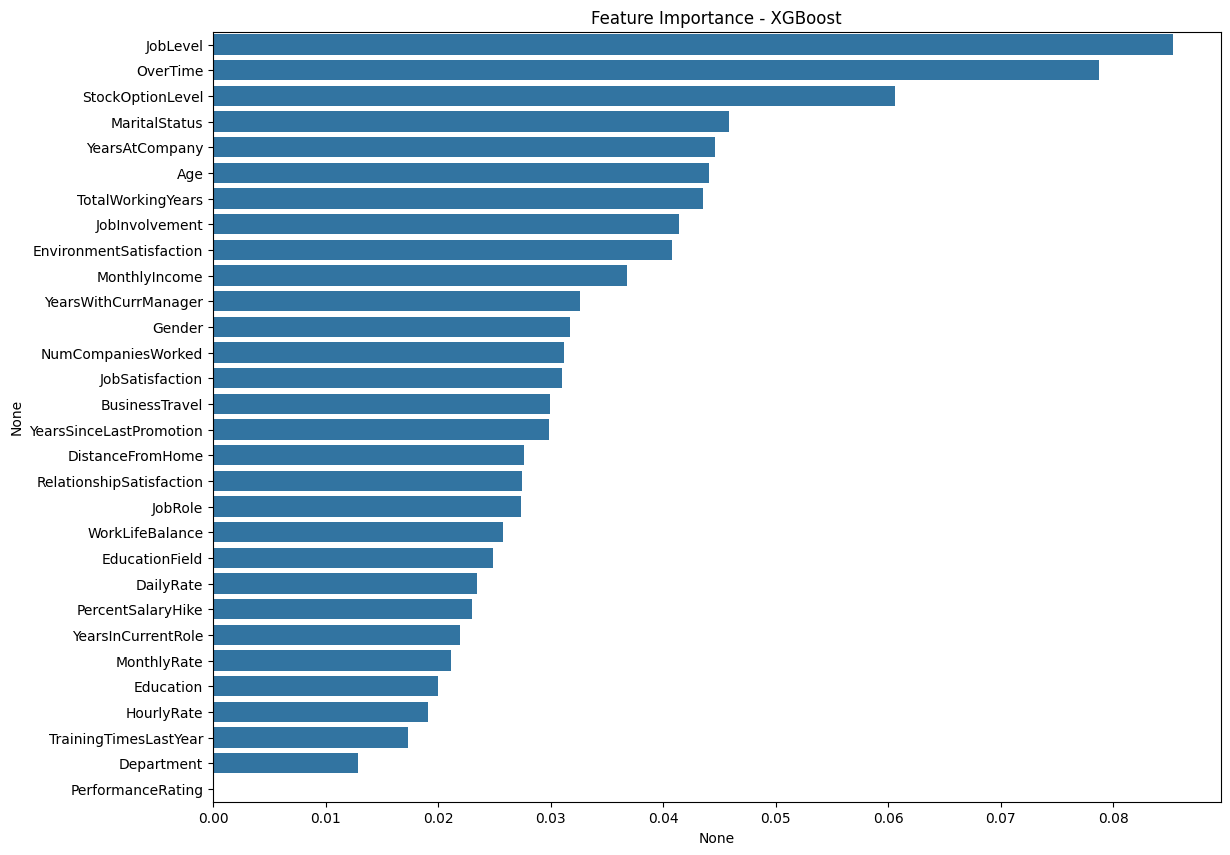

In [24]:
# Create Feature Importance plot for XGBoost
importances = xgb_model.feature_importances_
feature_names = X.columns
xgb_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(13,10))
sns.barplot(x=xgb_importance, y=xgb_importance.index)
plt.title("Feature Importance - XGBoost")
plt.show()

### Saving model

In [25]:
# Save the models
with open('./models/rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('./models/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)